In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot')
from sklearn.datasets import make_blobs
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split

---
#Logistic Regression 1
---

In [2]:
def decision_boundary(clf, x1lowlimit, x1highlimit, y1lowlimit, y1highlimit):
    '''A very simplistic way of demonstrating the decision boundary'''
    
    #Get the coefficients from the parameteric model
    ccs = clf.coef_.ravel()
    
    #Get the intercept value from the model
    inter = clf.intercept_
    
    #Create some equally spaced points between 2 sets of limits that the user must provide
    xx1 = np.linspace(x1lowlimit, x1highlimit, 400)
    xx2 = np.linspace(x2lowlimit, x2highlimit, 400)
    
    y=[]
    for x1 in xx1:
        for x2 in xx2:
            #The linear model will return close to zero near the decision boundary
            if np.fabs((ccs[0]*x1) + (ccs[1] * x2) + inter) < 0.01:
                
                #append the pairs of points into the list y
                y.append((x1,x2))
    
    
    #return the list y, containing pairs of points that are close to the decision boundary
    return y

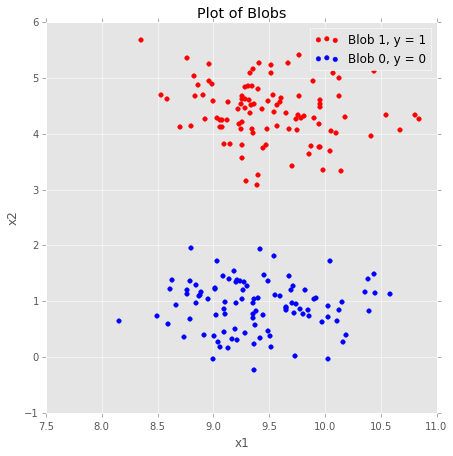

In [8]:
#number of training examples
m = 200

#number of features
N = 2

#number of distinct clusters or groupings or 'blobs'
num_blobs = 2

#using sklearn's 'make_blobs' functionality to make some clusters of data
#blobs also returns an array, y, which contains the identity of the blob each pair of points belongs to
X, y = make_blobs(n_samples = m, n_features = N, centers=num_blobs, cluster_std=0.5, random_state=4)

#Plot the blobs and color them for each blob
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
ax.scatter(X[y == 1,0], X[y == 1,1], color='red', label='Blob 1, y = 1')
ax.scatter(X[y == 0,0], X[y == 0,1], color='blue', label='Blob 0, y = 0')
ax.set_title("Plot of Blobs")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend(loc='best')

---
##Note that the above example illustrates the notion of Linear Separability in 2 dimensions
---

In [12]:
#Fit a basic logistic regression model
clf = LogisticRegression() 
clf.fit(X, y)

#A confusion matrix indicates the results of classification
#pd.crosstab returns a DataFrame
cm = pd.crosstab(y, clf.predict(X), rownames=["Actual"], colnames=["Predicted"])
cm

Predicted,0,1
Actual,,
0,100,0
1,0,100


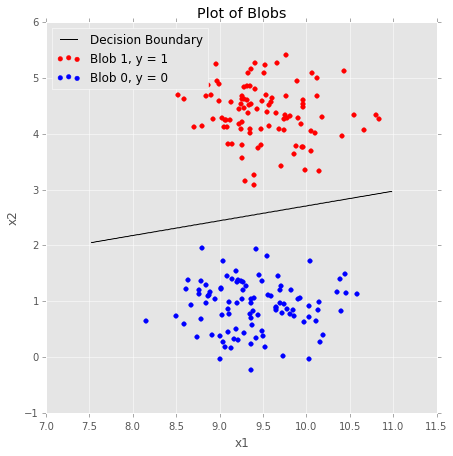

In [16]:
#Let's try and plot the decision boundary
#Set the limits from the plot of the datapoints
x1lowlimit = 7.5
x1highlimit = 11
x2lowlimit =-1
x2highlimit = 6

#Obtain the decision boundary points from the decision_boundary function
db = decision_boundary(clf, x1lowlimit, x1highlimit, x2lowlimit, x2highlimit)

#and plot in the usual way
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
ax.scatter(X[y == 1,0], X[y == 1,1], color='red', label='Blob 1, y = 1')
ax.scatter(X[y == 0,0], X[y == 0,1], color='blue', label='Blob 0, y = 0')
db=np.array(db)
ax.plot(db[:,0], db[:,1], 'k-', label='Decision Boundary')
ax.set_title("Plot of Blobs")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend(loc='upper left')

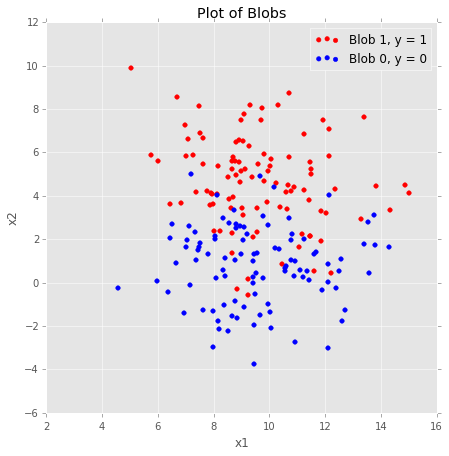

In [17]:
#Now let's bring the blobs closer together and intermix them
#These blobs are non-longer linearly separable
m = 200
N = 2
num_blobs = 2

#All we did was to increase the standard deviation of the blobs
X, y = make_blobs(n_samples = m, n_features = N, centers=num_blobs, cluster_std=2.0, random_state=4)

fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
ax.scatter(X[y == 1,0], X[y == 1,1], color='red', label='Blob 1, y = 1')
ax.scatter(X[y == 0,0], X[y == 0,1], color='blue', label='Blob 0, y = 0')
ax.set_title("Plot of Blobs")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend(loc='best')

In [18]:
#Fit a Logistic Regression model again
clf = LogisticRegression() 
clf.fit(X, y)

#compute the confusion matrix
cm = pd.crosstab(y, clf.predict(X), rownames=["Actual"], colnames=["Predicted"])
cm

Predicted,0,1
Actual,,
0,84,16
1,17,83


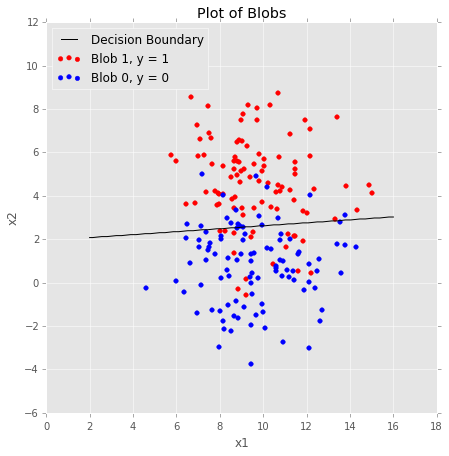

In [19]:
#Now let's look at the decision boundary
#Using the plot above set the low and high limits for each dimension - needed for the decision_boundary function
x1lowlimit = 2
x1highlimit = 16
x2lowlimit = -6
x2highlimit = 12

#Get some points near the decision boundary
db = decision_boundary(clf, x1lowlimit, x1highlimit, x2lowlimit, x2highlimit)

#Plot the points and the decision boundary
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
ax.scatter(X[y == 1,0], X[y == 1,1], color='red', label='Blob 1, y = 1')
ax.scatter(X[y == 0,0], X[y == 0,1], color='blue', label='Blob 0, y = 0')
db=np.array(db)
ax.plot(db[:,0], db[:,1], 'k-', label='Decision Boundary')
ax.set_title("Plot of Blobs")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend(loc='upper left')

---
##This is the best decision boundary that can be drawn to maximize the correct classification of the training data
---